#  <font color='teal'>**Semantic Spotter Project**</font>


---











 ##### <font color="brown">**Option  1: Insurance domain + Build the rag pipeline using llamaindex.**</font>

## **Why RAG ?**

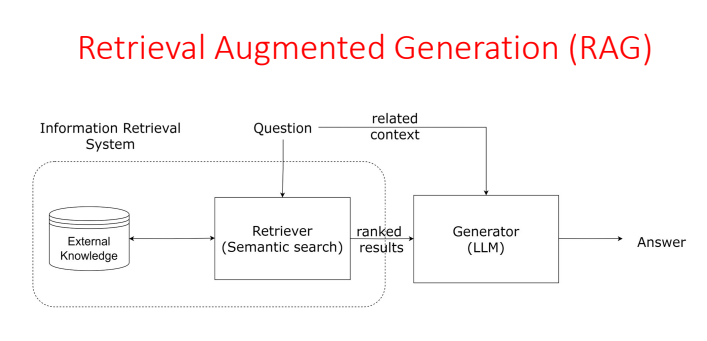

### <font color='teal'>**Retrieval-Augmented Generation (RAG)**</font>
RAG is a method that improves the responses of a language model by using information from a knowledge base. It's like giving the model a library of information to reference when it's generating a response. This makes the model's responses more accurate and relevant.

### <font color='teal'>**RAG Combines Two Types of Models:**</font>
- **Retrieval models**, which pull data from a knowledge base, and  
- **Generative models**, which create the responses.

### <font color='teal'>**Benefits of RAG:**</font>
This combination makes RAG more powerful than a model that only generates responses. It can answer difficult questions and provide more informative responses.


**Without RAG**: LLM's don't have any information on the domain/enterprise specific query.



Using  RAG We are can connect an external data ingested & transformed embeddings into vectorDB. We can peform Semantic search or say dot product or cosine similarity and return  top k relevant documents. We can then pass this return context along with  user query using decorated prompt engineering to llm to repspond to user query from domain specific docs say here insurance documents.

 RAG also helps to cache the latest query and answer in cache. If check in similary query present in cache  if yes return from cache. If not found in cache then perform semantic search and using context check with llm for query. results in cache return from cache from save usig past coversation else perfrom sematic search search in vector with top k context generate the response usign llm.

 RAG also helps in overcoming the problem of fixed token size issues with Llm and hallucination.

##**Why LlamaIndex ?**


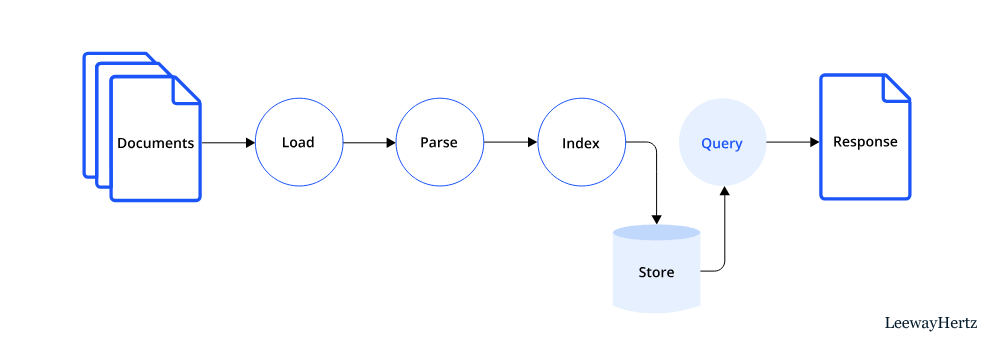


LlamaIndex is a cutting-edge data framework designed to streamline the development of **Retrieval-Augmented Generation (RAG)** applications using large language models (LLMs). It provides a robust platform that enables developers to integrate various data sources seamlessly with LLMs.

Supporting multiple file formats such as **PDFs, PowerPoint presentations**, and a range of applications like **Notion and Slack**, LlamaIndex even allows for integration with databases like **Postgres and MongoDB**. The framework offers a rich set of connectors that simplify data ingestion, making it easy to bring diverse information into the LLM workflow.

In addition to its versatile data integration capabilities, **LlamaIndex** excels at data retrieval and querying, providing an efficient interface for extracting relevant information. With LlamaIndex, developers can input any LLM prompt and receive an output that is not only contextually relevant but also enriched with knowledge from the connected data sources.

### <font color='teal'>**Key Features of LlamaIndex**</font>:

- **Versatile Data Connectors**: LlamaIndex offers robust connectors that allow seamless ingestion of data from a wide range of sources and formats.

- **Data Synthesis**: It can efficiently synthesize information from multiple documents or heterogeneous data sources, enabling comprehensive insights.

- **Extensive Integrations**: LlamaIndex supports numerous integrations, including vector stores, ChatGPT plugins, tracing tools, LangChain, and more, enhancing its versatility and functionality.

### <font color='teal'>**Some Popular Use Cases Include the Following**</font>:
* Question-Answering Chatbots (commonly referred to as RAG, or "Retrieval-Augmented Generation")
* Document Understanding and Extraction
* Autonomous Agents that can perform research and take actions


## <font color='brown'>**Part 1 - Overall Product Specifications**</font>

**<font color='teal'>Problem Statement</font>** - Build a robust generative search system capable of effectively and accurately answering questions from a list of HDFC Insurance policy documents.

**<font color='teal'>Solution Strategy</font>** - The solution should address the following requirements:

- Users should receive accurate responses from the insurance policy knowledge base.
- When users perform queries, the system must be able to respond accurately and effectively.

**<font color='teal'>Goal</font>** - Successfully meeting the above requirements will ensure that the overall model performs well and delivers high accuracy.

**<font color='teal'>Data Used</font>** - HDFC Insurance policy documents stored in a single folder.

**<font color='teal'>Tools Used</font>** - LlamaIndex and ChatGPT are utilized due to their powerful query engines, efficient data processing using data loaders and directory readers, and their ease of implementation with minimal lines of code.


## <font color='brown'>**Part 2 - Proposed Solution**</font>


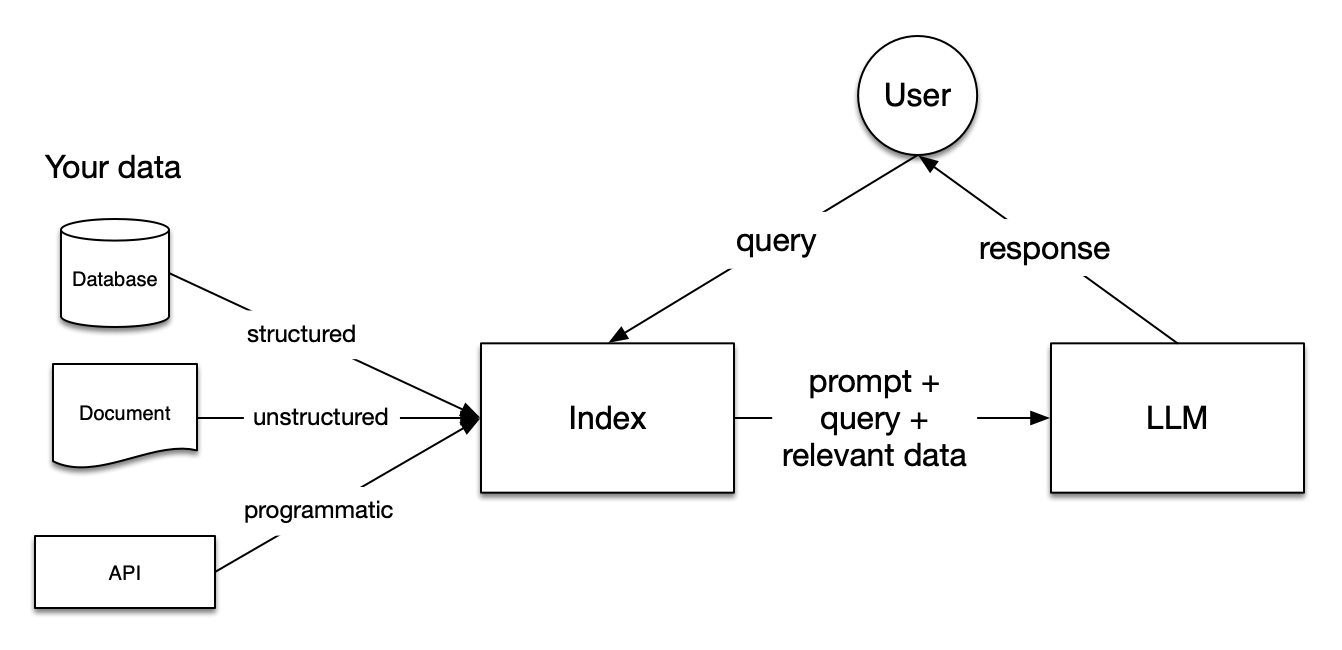

### Architecture Overview

#### **Data Sources**
- **<font color='teal'>Database</font>**: Represents structured data from a traditional database system where data is organized in a predefined manner.
- **<font color='teal'>Document</font>**: Signifies unstructured data, including documents with varied formats and information.
- **<font color='teal'>API</font>**: Indicates data accessed and manipulated through application programming interfaces.

#### **Indexing**
- **<font color='teal'>Index</font>**: Serves as a crucial intermediary that consolidates inputs from the database, documents, and API data, preparing them for efficient querying.

#### **User Interaction**
- **<font color='teal'>User</font>**: Represents the point of interaction where the user initiates a query directed towards the Index.

#### **Response Generation**
- **<font color='teal'>Index Processing:</font>**The Index processes the query, retrieves relevant data, and combines it with a prompt and the original query. This composite information is sent to the LLM.

#### **LLM Output**
- **<font color='teal'>LLM Processing:</font>** The LLM processes the combined input and generates a response, which is then returned to the user, completing the interaction loop.


### Core Components Of LlamaIndex

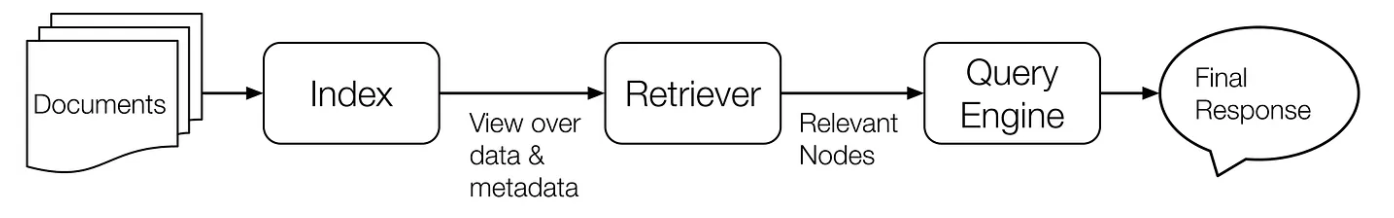

You can understand the core components of Llamaindex with this analogy:
1. Documents: These are the "books" in your library.
2. Index: It's the "library" of your data - Stores your data.
3. Retriever: It's the "librarian" that finds relevant data - Finds data.
4. Response Synthesizer: It's the "storyteller" that creates a response - Makes responses.
5. QueryEngine: It's the "director" that makes everything work together - Coordinates everything.

## **Step 1: Import the necessary libraries**

In [116]:
#install llamaindex
!pip install llama-index

In [117]:
# installing openai
!pip install openai

In [118]:
from llama_index.llms.openai import OpenAI
from llama_index.core.llms import ChatMessage
import os
import openai
import pandas as pd

In [119]:

%pip install llama-index-llms-openai
!pip install llama-index

In [120]:
!pip install pypdf

In [121]:
#Loading docx2txt for document reading related dependencies
!pip install docx2txt

## **Step 2 : Mount your Google Drive and Set the API key**

In [122]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [123]:
# Set the API key
filepath = "/content/drive/MyDrive/music/Music/gen ai /Semantic Spotter Project/"
with open(filepath + "OpenAI_API_Key.txt", "r") as f:
  openai.api_key = ' '.join(f.readlines())

## **Step 3 :Data Loading (Ingestion)**

Before your LLM can act on your data, you need to process and load it. The way LlamaIndex does this is via data connectors, also called `Reader`. Data connectors ingest data from different data sources and format the data into `Document` objects. A `Document` is a collection of data (currently text, and in future, images and audio) and metadata about that data.


***3 ways to do this***

- If you have a single file containing all the required data, use a data loader or reader from [LLamahub](https://llamahub.ai/)
    https://llamahub.ai/l/readers/llama-index-readers-file

- If you have multiple files, the simplest way is to use  **SimpleDirectoryReader**. It is built in to LlamaIndex and can read a variety of formats including Markdown, PDFs, Word documents, PowerPoint decks, images, audio and video. Just ensure that for reading each file type the necessary dependency libraries are already installed.
    https://docs.llamaindex.ai/en/stable/module_guides/loading/simpledirectoryreader.html


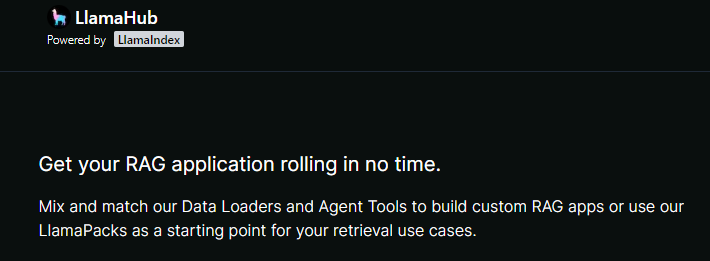

- Llamaparse: A very recent method for parsing documents. This is claimed as the first **GenAI native document parsing platform** .

    - [LinkedIn Post](https://www.linkedin.com/posts/llamaindex_were-excited-to-officially-launch-llamaparse-activity-7173714437860782080-Zqmf)

    - [Blog Post](https://www.llamaindex.ai/blog/launching-the-first-genai-native-document-parsing-platform)

**Recommendation** - No matter how powerful the given data loader is, ensure that your file is properly formatted, and the loader is able to read the file clearly, or the query engine might fail.

In [124]:
# reading the multiple files for insurance data.
from llama_index.core import SimpleDirectoryReader, ServiceContext, VectorStoreIndex
reader = SimpleDirectoryReader(input_dir="/content/drive/MyDrive/music/Music/gen ai /Semantic Spotter Project/Policy Documents")

In [125]:
documents = reader.load_data()
print(f"Loaded {len(documents)} docs")

Loaded 217 docs


In [126]:
documents[0]

Document(id_='184e3a48-867f-4291-953c-6ae243f279f9', embedding=None, metadata={'page_label': '1', 'file_name': 'HDFC-Life-Easy-Health-101N110V03-Policy-Bond-Single-Pay.pdf', 'file_path': '/content/drive/MyDrive/music/Music/gen ai /Semantic Spotter Project/Policy Documents/HDFC-Life-Easy-Health-101N110V03-Policy-Bond-Single-Pay.pdf', 'file_type': 'application/pdf', 'file_size': 1303156, 'creation_date': '2024-09-10', 'last_modified_date': '2024-08-31'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={}, text=' \n             Part A \n<<Date>> \n<<Policyholder’s Name>>  \n<<Policyholder’s Address>> \n<<Policyholder’s Contact Number>>  \n \nDear <<Policyholder’s Name>>,  \n \nSub: Your Policy no. <<  >> \nWe are glad to inform you that your proposal has been accepte

## **Step 4 - Building the query engine**

A Query Engine wraps a Retriever and a ResponseSynthesizer into a pipeline. It uses the query string to fetch nodes and then sends them to the Large Language Model (LLM) to generate a response.

In [127]:
from llama_index.core.node_parser import SimpleNodeParser
from llama_index.core.indices.vector_store.base import VectorStoreIndex
#from llama_index import VectorStoreIndex
from IPython.display import display, HTML


# # build index
index = VectorStoreIndex(documents)

# Construct Query Engine
query_engine = index.as_query_engine()

- #### **Using VectorStoreIndex**
Vector Stores are a key component of RAG and so you will end up using them in nearly every application you make using LlamaIndex, either directly or indirectly.
Vector stores accept a list of Node objects and build an index from it.
<br>
- #### **Query Engines**
Query engine is a generic interface that allows you to ask question over your data.
A query engine takes in a natural language query, and returns a rich response. It is **most** often (but not always) built on one or many indexes via retrievers. You can compose multiple query engines to achieve more advanced capability.


## **Step 5 - Checking responces and its parameters**

In [128]:
response=query_engine.query("How we utilise the vesting benefits")

In [129]:
#Checking the response
response

Response(response='You can utilize the vesting benefits by either purchasing immediate annuity or deferred annuity from the Company at the prevailing annuity rate, or you can commute up to 60% of the vesting benefit and use the remaining amount to purchase immediate annuity or deferred annuity from the Company at the prevailing annuity rate. Additionally, you have the option to purchase immediate annuity or deferred annuity from another insurer to the extent of 50% of the entire vesting benefit net of commutation, as prescribed by the IRDAI.', source_nodes=[NodeWithScore(node=Document(id_='c8e2ed8a-a2a1-4e82-8555-95d3b24d9316', embedding=None, metadata={'page_label': '8', 'file_name': 'HDFC-Life-Smart-Pension-Plan-Policy-Document-Online.pdf', 'file_path': '/content/drive/MyDrive/music/Music/gen ai /Semantic Spotter Project/Policy Documents/HDFC-Life-Smart-Pension-Plan-Policy-Document-Online.pdf', 'file_type': 'application/pdf', 'file_size': 983547, 'creation_date': '2024-09-10', 'last_

In [130]:
#Checking the response
response.response

'You can utilize the vesting benefits by either purchasing immediate annuity or deferred annuity from the Company at the prevailing annuity rate, or you can commute up to 60% of the vesting benefit and use the remaining amount to purchase immediate annuity or deferred annuity from the Company at the prevailing annuity rate. Additionally, you have the option to purchase immediate annuity or deferred annuity from another insurer to the extent of 50% of the entire vesting benefit net of commutation, as prescribed by the IRDAI.'

In [131]:
# checking source node
response.source_nodes

[NodeWithScore(node=Document(id_='c8e2ed8a-a2a1-4e82-8555-95d3b24d9316', embedding=None, metadata={'page_label': '8', 'file_name': 'HDFC-Life-Smart-Pension-Plan-Policy-Document-Online.pdf', 'file_path': '/content/drive/MyDrive/music/Music/gen ai /Semantic Spotter Project/Policy Documents/HDFC-Life-Smart-Pension-Plan-Policy-Document-Online.pdf', 'file_type': 'application/pdf', 'file_size': 983547, 'creation_date': '2024-09-10', 'last_modified_date': '2024-08-31'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={}, text='HDFC  Life Smart Pension Plan 101L164V02  – Terms and Conditions  (Direct & \nOnline Sales)  \n(A Unit Linked Non -Participating Individual Pension Plan)   \n  Page 8 of 37  \n \nPART C  \nProduct Core Benefit s  \n \nSubject to the provisions and 

In [132]:
# extract metadata
response.source_nodes[0].node.metadata

{'page_label': '8',
 'file_name': 'HDFC-Life-Smart-Pension-Plan-Policy-Document-Online.pdf',
 'file_path': '/content/drive/MyDrive/music/Music/gen ai /Semantic Spotter Project/Policy Documents/HDFC-Life-Smart-Pension-Plan-Policy-Document-Online.pdf',
 'file_type': 'application/pdf',
 'file_size': 983547,
 'creation_date': '2024-09-10',
 'last_modified_date': '2024-08-31'}

In [133]:
# extract filename
response.source_nodes[0].node.metadata['file_name']

'HDFC-Life-Smart-Pension-Plan-Policy-Document-Online.pdf'

In [134]:
#Extract the score
response.source_nodes[0].score

0.816475543272108

In [135]:
# install lib for query-re-ranking to return better results
!pip install llama-index-postprocessor-cohere-rerank

In [136]:
# customizing the prompts.
from llama_index.core import PromptTemplate

text_qa_template_str = (
    "Context information is"
    " below.\n---------------------\n{context_str}\n---------------------\nUsing"
    " both the context information and also using your own knowledge, answer"
    " the question: {query_str}\nIf the context isn't helpful, you can also"
    " answer the question on your own.\n"
)
text_qa_template = PromptTemplate(text_qa_template_str)


refine_template_str = (
    "The original question is as follows: {query_str}\nWe have provided an"
    " existing answer: {existing_answer}\nWe have the opportunity to refine"
    " the existing answer (only if needed) with some more context"
    " below.\n------------\n{context_msg}\n------------\nUsing both the new"
    " context and your own knowledge, update or repeat the existing answer.\n"
)
refine_template = PromptTemplate(refine_template_str)


## **Step 6 - Creating a response Pipeline**


User receives the response and the document that they can refer to

In [137]:
# deinfing ll
llm = OpenAI(model="gpt-3.5-turbo")
import os
from llama_index.postprocessor.cohere_rerank import CohereRerank
from llama_index.core.postprocessor import SimilarityPostprocessor

cohere_rerank = CohereRerank(api_key=openai.api_key, top_n=3)
response=index.as_query_engine(
        similarity_top_k=3,
        node_postprocessors=[cohere_rerank],
        text_qa_template=text_qa_template,
        refine_template=refine_template,
        llm=llm
)

In [138]:
def initialize_conv():
  print('Feel free to ask Questions regarding uber 2022 financial report. Press exit once you are done')
  while True:
    user_input = input()
    # Type 'exit' to exit conversation
    if user_input.lower() == 'exit':
      print('Exiting the program... bye')
      break
    else:
      response = query_response(user_input)
      display(HTML(f'<p style="font-size:20px">{response}</p>'))

## **Step 6 - Build a Testing Pipeline**

Here we feed a series of questions to the Q/A bot and store the responses along with the feedback on whether it's accurate or not from the user

In [139]:
# Definig the user query.
questions = ["What are the conditions under which the insurance coverage for a Scheme Member will terminate?","what is beneficiary in HDFC insurance policy?", 'What are Accidental Death Benefits',' who is eligible member in the context of insurance policy?']


In [140]:
!pip install diskcache
import openai
import diskcache as dc

cache = dc.Cache('./gpt_cache')



In [141]:
cache.set("A", "solution")

True

In [142]:
print(cache.get("A"))

solution


In [143]:
def query_response(user_input):
    final_response=""
    cache_response=None
    cache_response=cache.get(user_input)
    if cache_response is None:
      response=query_engine.query(user_input)
      print("Answer from LLM:\n")
      file_name = response.source_nodes[0].node.metadata['file_name']
      response = response.response + '\nCheck further at ' + file_name + ' for document references.'+'\nSimilarity score is :' + str(response.source_nodes[1].score)
      cache.set(user_input, response)
      final_response=response
    else:
      print("Answer  from cache:\n")
      final_response=cache_response

    return final_response



In [148]:
query_response("What are Accidental Death Benefits")


Answer  from cache:



'Accidental Death Benefits include the payment of a benefit if the death of a Scheme Member occurs within 180 days from the date of an accident. However, there are specific exclusions for this benefit, such as instances like intentionally self-inflicted injury, engaging in hazardous pursuits, involvement in criminal acts, or participating in war or civil unrest.\nCheck further at HDFC-Life-Group-Poorna-Suraksha-101N137V02-Policy-Document.pdf for document references.\nSimilarity score is :0.8170240007215589'

In [145]:
def testing_pipeline(questions):
  test_feedback  = []
  for i in questions:
    print(i)
    print(query_response(i))
    print('\n Please provide your feedback on the response provided by the bot')
    user_input = input()
    test_feedback.append((i,query_response(i),user_input))
  feedback_df = pd.DataFrame(test_feedback, columns =['Question', 'Response', 'Good or Bad'])
  return feedback_df

In [146]:
testing_pipeline(questions)

What are the conditions under which the insurance coverage for a Scheme Member will terminate?
Answer  from cache:

The insurance coverage for a Scheme Member will terminate under the following conditions:
- Master Policy being terminated
- End of Coverage Term
- Surrender of Certificate of Insurance
- Free Look Cancellation
- Payment of Plan Benefit
- Refund of premium under Suicide Clause
Check further at HDFC-Life-Group-Poorna-Suraksha-101N137V02-Policy-Document.pdf for document references.
Similarity score is :0.8503726392043668

 Please provide your feedback on the response provided by the bot
Good
Answer  from cache:

what is beneficiary in HDFC insurance policy?
Answer  from cache:

The beneficiary in HDFC insurance policy is the individual or entity designated by the insured member to receive the benefits under the policy in the event of the insured member's death. If no designated nominee is filed or if the nominee predeceases the insured member, the benefits will be payable t

,Question,Response,Good or Bad
0,What are the conditions under which the insura...,The insurance coverage for a Scheme Member wil...,Good
1,what is beneficiary in HDFC insurance policy?,The beneficiary in HDFC insurance policy is th...,Good
2,What are Accidental Death Benefits,Accidental Death Benefits include the payment ...,Good
3,who is eligible member in the context of insu...,An eligible member in the context of the insur...,Good


In [147]:
print(query_response("What are the conditions under which the insurance coverage for a Scheme Member will terminate?"))


Answer  from cache:

The insurance coverage for a Scheme Member will terminate under the following conditions:
- Master Policy being terminated
- End of Coverage Term
- Surrender of Certificate of Insurance
- Free Look Cancellation
- Payment of Plan Benefit
- Refund of premium under Suicide Clause
Check further at HDFC-Life-Group-Poorna-Suraksha-101N137V02-Policy-Document.pdf for document references.
Similarity score is :0.8503726392043668


## <font color='Brown'>**Conclusion and Opinions:**</font>

---




The development of the **HDFC insurance policy Q/A bot (Semantic spotter)** was a successful venture, integrating multiple advanced AI techniques, including **Retrieval-Augmented Generation (RAG)**, **prompt customization**,  **Llamaindex** and **caching mechanisms**. The process offered several key insights into building intelligent systems capable of extracting and presenting information from large, unstructured document sets.

### <font color='teal'>**Key Achievements**</font>
- **Caching Mechanism**: Incorporating a **disk-based caching** mechanism helped to optimize response times, particularly for repeated queries, leading to a better user experience.
- **Seamless Document Loading and Indexing**: Leveraging **llamaindex** for parsing and indexing policy documents allowed for easy integration of the system with various file types, including PDFs and DOCX files.
- **LLM Integration for High-Quality Responses**: The integration of **OpenAI's GPT-3.5-turbo** allowed the bot to deliver well-informed, contextually rich answers that met user expectations.
- **User Interaction Pipeline**: The development of an interactive user feedback loop enabled ongoing refinement of the system by collecting data on the accuracy and relevance of the responses.


### <font color='teal'>**Challenges Overcome**</font>
- **GPTCache Compatibility Issues**: Although initial attempts to use **GPTCache** were unsuccessful due to compatibility issues, the adoption of a simpler **disc-based caching** approach provided a reliable solution to meet the needs of the system.
- **Complex Document Structures**: Handling and processing unstructured data from multiple insurance documents posed a challenge, but the integration of **SimpleDirectoryReader** and vector indexing allowed for effective document management.

### <font color='teal'>**Future Improvements**</font>
- **Advanced Caching Solutions**: Exploring more robust caching mechanisms, such as **GPTCache** or **Redis**, could improve system scalability and performance for larger datasets.
- **Multi-LLM Support**: Future versions could integrate multiple large language models, allowing the system to switch between models for different types of queries, ensuring better accuracy across a wide range of topics.
- **Expanded Query Handling**: Scaling the system to handle more complex queries and larger document sets will be a future focus, improving the breadth and depth of the responses.
- **Refinement through Feedback**: Continuous refinement based on user feedback, particularly with the testing pipeline, will be key in improving response accuracy and user satisfaction.

### <font color='teal'>**Final Thoughts**</font>
The project was a significant step towards building intelligent, AI-driven systems for processing and retrieving information from dense and complex document sets. , enabling effective information retrieval from complex, unstructured documents.
 By successfully integrating The combination of **semantic search**, **LLMs**, **LlammaIndex** and **caching** highlighted the potential of AI systems in real-world applications, this Q/A bot demonstrates how AI can be leveraged to simplify access to information in industries like insurance. Continuous refinement and scaling of the system will unlock even more powerful capabilities in the future.